In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import geopy.distance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns
import datetime as dt
#from plot_roc import plot_roc

In [2]:
#read in and clean conflict data 
conflict_df = pd.read_csv('../data/conflict_data_irq.csv')
conflict_df.drop(0, inplace=True)
conflict_df['date_start'] = pd.to_datetime(conflict_df['date_start'])
conflict_df['date_end'] = pd.to_datetime(conflict_df['date_start'])

In [3]:
#creating dictionary to standardize governorate names across datasets
governorate_dict = {'Al Anbār province':'Anbar', 'Nīnawá province':'Ninewa',
'Baghdād province':'Baghdad','Dahūk province':'Dahuk', 'Diyālá province':'Diyala','Kirkūk province':'Kirkuk',
'Şalāḩ ad Dīn province':'Salah al-Din', 'Karbalā’ province':'Kerbala', 'An Najaf province':'Najaf',
'Bābil province':'Babylon','Arbīl province':'Erbil','Al Başrah  province':'Basrah','Dhī Qār province':'Thi-Qar',
'Al Muthanná province':'Muthanna','As Sulaymānīyah province':'Sulaymaniyah', 'Maysān  province':'Missan',
'Al Qādisīyah province':'Qadissiya', 'Wāsiţ province':'Wassit'}

In [4]:
conflict_df.replace(to_replace=governorate_dict, inplace=True)

In [5]:
#creating dictionary to standardize district names across datasets
district_dict = {'Abū Ghurayb district':'Abu Ghraib',
'Al Ba‘āj district':"Al-Ba'aj",
'Al Qā’im district':"Al-Ka'im",
'Al-Faris district':'Al-Fares',
'Hīt district':'Heet',
'Qaḑā’ ‘Ānah':'Ana',
'Qaḑā’ ad Dawr':'Al-Daur',
'Qaḑā’ al Fallūjah':'Falluja',
'Qaḑā’ al Ḩaḑr':'Hatra',
'Qaḑā’ al Ḩamdānīyah':'Al-Hamdaniya',
'Qaḑā’ al Khāliş':'Al-Khalis',
'Qaḑā’ al Maḩmūdīyah':'Mahmoudiya',
'Qaḑā’ al Mawşil':'Mosul',
'Qaḑā’ al Miqdādīyah':'Al-Muqdadiya',
'Qaḑā’ ar Ramādī':'Ramadi',
'Qaḑā’ ar Ruţbah':'Al-Rutba',
'Qaḑā’ ash Shaykhān':'Al-Shikhan',
'Qaḑā’ Balad':'Balad',
'Qaḑā’ Bayjī':'Baiji',
'Qaḑā’ Haditha':'Haditha',
'Qaḑā’ Khānaqīn':'Khanaqin',
'Qaḑā’ Kifrī':'Kifri',
'Qaḑā’ Sāmarrā':'Samarra',
'Qaḑā’ Sharqāţ':'Al-Shirqat',
'Qaḑā’ Tall ‘Afar':'Telafar',
'Qaḑā’ Tikrīt':'Tikrit',
'Qaḑā’ Zākhū':'Zakho',
'Sinjār district':'Sinjar',
'Tallkayf district':'Tilkaif',
'Tooz district':'Tuz Khurmatu',
'Zakho district':'Zakho',
"Al ‘Amādīyah":'Amedi',
"Al ‘Amādīyah district":'Amedi',
"Al ‘Azīzīyah district":'Al-Azezia',
"Al Madā’in district":'Al-Midaina',
'Al Majar al Kabīr district':'Al-Mejar Al-Kabir',
'Al Maymūnah district':'Al-Maimouna',
'Al-Shirqat district':'Al-Shirqat',
'Baladrūz district':'Baladrooz',
'Dāqūq district':'Daquq',
'Kuwaysinjaq district':'Koisnjaq',
'Mergasur District':'Mergasur',
'Paynjuwayn district':'Penjwin',
"Qaḑā al ‘Amārah":'Amara',
'Qaḑā al Chibāyish':'Al-Chibayish',
'Qaḑā Karbalā’':'Kerbala',
"Qaḑā’ ‘Alī al Gharbī":'Ali Al-Gharbi',
'Qaḑā’ ad Dīwānīyah':'Diwaniya',
'Qaḑā’ Ain Al Tamur':'Ain Al-Tamur',
'Qaḑā’ al Başrah':'Basrah',
'Qaḑā’ al Hāshimīyah':'Hashimiya',
'Qaḑā’ al Ḩawījah':'Al-Hawiga',
'Qaḑā’ al Ḩayy':'Al-Hai',
'Qaḑā’ al Ḩillah':'Hilla',
'Qaḑā’ al Hindīyah':'Al-Hindiya',
'Qaḑā’ al Kūfah':'Kufa',
'Qaḑā’ al Kūt':'Kut',
'Qaḑā’ al Maḩāwīl':'Al-Mahawil',
'Qaḑā’ al Manādhirah':'Al-Manathera',
'Qaḑā’ al Musayyib':'Al-Musayab',
'Qaḑā’ al Qurnah':'Al-Qurna',
'Qaḑā’ an Najaf':'Najaf',
'Qaḑā’ an Nāşirīyah':'Nassriya',
'Qaḑā’ Arbīl':'Erbil',
'Qaḑā’ as Samāwah':'Al-Samawa',
'Qaḑā’ aş Şuwayrah':'Al-Suwaira',
'Qaḑā’ ash Shāmīyah':'Al-Shamiya',
'Qaḑā’ ash Shaţrah':'Al-Shatra',
'Qaḑā’ az Zubayr':'Al-Zubair',
"Qaḑā’ Ba‘qūbah":"Ba'quba",
'Qaḑā’ Chamchamal':'Chamchamal',
'Qaḑā’ Chomān':'Choman',
'Qaḑā’ Dahūk':'Dahuk',
'Qaḑā’ Dibis':'Dabes',
'Qaḑā’ Ḩadīthah':'Haditha',
'Qaḑā’ Ḩalabchah':'Halabja',
'Qaḑā’ Kalār':'Kalar',
'Qaḑā’ Kirkūk':'Kirkuk',
'Qaḑā’ Makhmūr':'Makhmur',
'Qaḑā’ Miqdādīyah':'Al-Muqdadiya',
'Qaḑā’ Pishdar':'Pshdar',
'Qaḑā’ Rāniyah':'Rania',
'Qaḑā’ Shahrbāzār':'Sharbazher',
'Qaḑā’ Shaqlāwah':'Shaqlawa',
'Qaḑā’ Sulaymānīyah':'Sulaymaniya',
'Qaḑā’ Sūq ash Shuyūkh':'Suq Al-Shoyokh',
'Qaḑā’ Zākhū':'Zakho',
'Soran district':'Soran'}

In [6]:
conflict_df.replace(to_replace=district_dict, inplace=True)

In [7]:
#filtering down conflict data so it only includes events in districts where displacement occurred 
conflict_df = conflict_df[conflict_df['adm_2'].isin(list(district_dict.values()))]


In [8]:
%%time
#reads in data on outflow of refugees, concatenates into dataframe
outflow_filepaths = [s for s in listdir("../data/out/")]
out_df = pd.concat((pd.read_csv("../data/out/"+s) for s in outflow_filepaths), ignore_index=True) 


CPU times: user 3.33 s, sys: 742 ms, total: 4.07 s
Wall time: 4.81 s


In [9]:
out_df.dropna(how='any', inplace=True)

In [10]:
#cleanup of data types 
out_df['date'] = pd.to_datetime(out_df['date'])
out_df.rename(columns={'Location Name':'Location_name'}, inplace=True)
out_df['Location ID'] = out_df['Location ID'].astype(int)
out_df['Place ID'] = out_df['Place ID'].astype(int)
out_df['Families'] = out_df['Families'].astype(int)
out_df['Individuals'] = out_df['Individuals'].astype(int)
out_df.rename(columns={'Place ID':'Place_ID'}, inplace=True)


In [11]:
#renaming columns so it's clear that refugees are DISPLACED FROM these governorates of origin
out_df.rename(columns={'Anbar':'disp_from_Anbar', 'Babylon':'disp_from_Babylon', 
                       'Baghdad':'disp_from_Baghdad', 'Basrah':'disp_from_Basrah',
                       'Dahuk':'disp_from_Dahuk','Diyala':'disp_from_Diyala',
                       'Erbil':'disp_from_Erbil','Kerbala':'disp_from_Kerbala', 
                       'Kirkuk':'disp_from_Kirkuk', 'Missan':'disp_from_Missan', 
                       'Muthanna':'disp_from_Muthana','Najaf':'disp_from_Najaf', 
                       'Ninewa':'disp_from_Ninewa', 'Qadissiya':'disp_from_Qadissiya', 
                        'Salahal Din':'disp_from_Salahal Din', 'Sulaymaniyah':'disp_from_Sulaymaniyah', 
                       'Thi Qar':'disp_from_Thi Qar', 'Wassit':'disp_from_Wassit'}, inplace=True)

In [12]:
#making clear that these features represent the living situation of refugees who have fled their homes
out_df.rename(columns={'Camp':'out_Camp', 'Hostfamilies':'out_Hostfamilies', 
        'Hotel Motel':'out_Hotel Motel', 'Informalsettlements':'out_Informalsettlements',
       'Own Property':'out_Own Property', 'Other':'out_Other', 
       'Religiousbuilding':'out_Religiousbuilding', 'Rented pre Apr 2019':'out_Rented pre Apr 2019',
       'Rented Habitable': 'out_Rented Habitable', 'Rented Uninhabitable':'out_Rented Uninhabitable', 
       'Schoolbuilding':'out_Schoolbuilding','Unfinishedbuilding':'out_Unfinishedbuilding', 
        'Unknownsheltertype':'out_Unknownsheltertype'}, inplace=True)

In [13]:
%%time
#reads in data on returning refugees, concatenates into large dataframe 
returnee_filepaths = [f for f in listdir("../data/inflow/")]
ret_df = pd.concat((pd.read_csv("../data/inflow/"+f)
                  for f in returnee_filepaths), ignore_index=True)

CPU times: user 1.29 s, sys: 266 ms, total: 1.56 s
Wall time: 1.88 s


In [14]:
#renaming features to clarify that refugees are returning to this type of shelter
ret_df.rename(columns={'Camp':'ret_camp',
       'Habitual Pre_31_October2018':'ret_Habitual Pre_31_October2018',
      'Habitual Residence (Habitable)':'ret_Habitual Residence (Habitable)',
       'Habitual Residence (Uninhabitable)':'ret_Habitual Residence (Uninhabitable)', 
       'Host_families':'ret_Host_families', 'Hotel_Motel':'ret_Hotel_Motel',
       'Informal_settlements':'ret_Informal_settlements', 
       'Other':'ret_Other', 'Religious_building':'ret_Religious_building', 
       'Rented_houses':'ret_Rented_houses', 'School_building':'ret_School_building', 
       'Unfinished_Abandoned_building':'ret_Unfinished_Abandoned_building',
       'Unknown_shelter_type':'ret_Unknown_shelter_type'}, inplace=True)

In [15]:
#renaming features to clarify that refugees are RETURNING (to their places of orogin)
#FROM these governorates 
ret_df.rename(columns={'Anbar':'ret_from_Anbar', 'Babylon':'ret_from_Babylon',
       'Baghdad':'ret_from_Baghdad', 'Basrah':'ret_from_Basrah', 'Dahuk':'ret_from_Dahuk',
       'Diyala':'ret_from_Diyala', 'Erbil':'ret_from_Erbil', 'Kerbala':'ret_from_Kerbala', 
        'Kirkuk':'ret_from_Kirkuk','Missan':'ret_from_Missan', 'Muthanna':'ret_from_Muthanna',
        'Najaf':'ret_from_Najaf', 'Ninewa':'ret_from_Ninewa', 'Qadissiya':'ret_from_Qadissiya', 
        'Salahal Din':'ret_from_Salahal Din'}, inplace=True)

In [16]:
#creating dictionary to standardize naming convention for wave of displacement
displacement_dict = {'Pre June14 Period of displacement':'disp_preJun14',
                      'June July14 Period of displacement':'disp_JunJuly14',
                      'August14 Period of displacement':'disp_Aug14',
                      'Post September 14 Period of displacement':'disp_postSep14',
                      'Post April15 Period of displacement':'disp_postApr15',
                      'Post March 16 Period of displacement':'disp_postMar16',
                      'Post 17 October 16 Period of displacement': 'disp_post17Oct16',
                      'July 17 Period of displacement':'disp_Jul17',
                      'Jan19':'disp_Jan19'}

In [17]:
ret_df.rename(columns=displacement_dict, inplace=True)
out_df.rename(columns=displacement_dict, inplace=True)

In [18]:
ret_df.dropna(how='all', inplace=True)
ret_df['date'] = pd.to_datetime(ret_df['date'])

In [19]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)



In [20]:
ret_df = trim_all_columns(ret_df)
out_df = trim_all_columns(out_df)

In [21]:
#Returnee data is cumulative, so it's necessary to get the delta by date (i.e., on 1OCT2015, 25
#households were [freshly] displaced, rather than as of 1OCT2015 100 households have been displaced )
ret_df.sort_values(['Location ID', 'date'], inplace=True)
ret_df.dropna(how='any', inplace=True)
ret_df['ret_delta'] = ret_df.groupby(['Location ID'])['Returnee Families'].transform(lambda x: x.diff()) 



In [22]:
ret_df.sort_values(['Location ID', 'date'], inplace=True)
ret_df.reset_index(inplace=True)
ret_df.drop(columns='index', axis=1, inplace=True)

In [23]:
#should be functionized 
for i in range(len(ret_df)):
    if np.isnan(ret_df.at[i, 'ret_delta']):
        ret_df.at[i, 'ret_delta'] = ret_df.at[i, 'Returnee Families']
    else:
        None

In [24]:

#Displacement data is cumulative, so it's necessary to get the delta by date (i.e., on 1OCT2015, 25
#households were [freshly] displaced, rather than as of 1OCT2015 100 households have been displaced )
out_df.sort_values(['Location ID', 'date'], inplace=True)
out_df.dropna(how='any', inplace=True)
out_df['out_delta'] = out_df.groupby(['Location ID'])['Families'].transform(lambda x: x.diff()) 





In [25]:
out_df.sort_values(['Location ID', 'date'], inplace=True)
out_df.reset_index(inplace=True)
out_df.drop(columns='index', axis=1, inplace=True)

In [26]:
for i in range(len(out_df)):
    if np.isnan(out_df.at[i, 'out_delta']):
        out_df.at[i, 'out_delta'] = out_df.at[i, 'Families']
    else:
        None

In [27]:
master_df = ret_df.merge(out_df, how='outer', on=['Location ID', 'date', 'Governorate',
                                                 'District', 'Place_ID', 'Location_name',
                                                 'disp_preJun14', 'disp_JunJuly14', 'disp_Aug14', 
                                                'disp_postSep14', 'disp_postApr15',
                                                'disp_postMar16', 'disp_post17Oct16', 
                                                  'disp_Jul17', 'disp_Jan19'])

In [28]:
master_df.rename(columns={'Families':'displaced_to', 'ret_delta':'returned_to'}, inplace=True)

In [29]:
#dropping irrelevant columns and those that would imply leakage from the test data
master_df.drop(columns=['Unnamed: 0_x', 'Latitude_x', 'Longitude_x', 'Latitude_y', 'Longitude_y',
                       'Unnamed: 0_y', 'Arabic_name', 'Governorate',
                        'Location_name', 'Returnee Individuals', 'Returnee Families',
                        'Arabic Name', 'ret_from_Anbar', 'ret_from_Babylon', 'ret_from_Baghdad',
       'ret_from_Basrah', 'ret_from_Dahuk', 'ret_from_Diyala', 'ret_from_Erbil',
       'ret_from_Kerbala', 'ret_from_Kirkuk', 'ret_from_Missan', 'ret_from_Muthanna',
       'ret_from_Najaf', 'ret_from_Ninewa', 'ret_from_Qadissiya', 'ret_from_Salahal Din',
    'ret_camp', 'Individuals',
       'ret_Habitual Pre_31_October2018', 'ret_Habitual Residence (Habitable)',
       'ret_Habitual Residence (Uninhabitable)', 'ret_Host_families',
       'ret_Hotel_Motel', 'ret_Informal_settlements', 'ret_Other',
       'ret_Religious_building', 'ret_Rented_houses', 'ret_School_building', 'Place_ID',
       'ret_Unfinished_Abandoned_building', 'ret_Unknown_shelter_type', 'Location ID', 
                       'Sulaymaniyah', 'Thi Qar', 'Wassit'], inplace=True)

In [30]:
master_df.columns

Index(['District', 'disp_preJun14', 'disp_JunJuly14', 'disp_Aug14',
       'disp_postSep14', 'disp_postApr15', 'disp_postMar16',
       'disp_post17Oct16', 'disp_Jul17', 'disp_Jan19', 'date', 'returned_to',
       'displaced_to', 'disp_from_Anbar', 'disp_from_Babylon',
       'disp_from_Baghdad', 'disp_from_Basrah', 'disp_from_Dahuk',
       'disp_from_Diyala', 'disp_from_Erbil', 'disp_from_Kerbala',
       'disp_from_Kirkuk', 'disp_from_Missan', 'disp_from_Muthana',
       'disp_from_Najaf', 'disp_from_Ninewa', 'disp_from_Qadissiya',
       'disp_from_Salahal Din', 'disp_from_Sulaymaniyah', 'disp_from_Thi Qar',
       'disp_from_Wassit', 'out_Camp', 'out_Hostfamilies', 'out_Hotel Motel',
       'out_Informalsettlements', 'out_Own Property', 'out_Other',
       'out_Religiousbuilding', 'out_Rented pre Apr 2019',
       'out_Rented Habitable', 'out_Rented Uninhabitable',
       'out_Schoolbuilding', 'out_Unfinishedbuilding',
       'out_Unknownsheltertype', 'out_delta'],
      dtype='ob

In [32]:
#making date ordinal so it can fit into the X dataset for ML algorithms 
master_df['date'] = master_df['date'].apply(lambda x: x.toordinal())
master_df.fillna(0, inplace=True)

In [33]:
#Groups conflict data by district and date and sums the best estimate of deaths (for that district)
#and date. Returns dataframe. 
g_conflict = pd.DataFrame({'count' : conflict_df.groupby( [ 'adm_2', 'date_start'])
                           ['best'].sum()}).reset_index()

In [34]:
#Makes date_start ordinal for algorithmic processing, renames columns 
g_conflict['date_start'] = g_conflict['date_start'].apply(lambda x: x.toordinal())
g_conflict.rename(columns={'adm_2':'District', 'date_start':'date', 'count':'death_est'}, 
                 inplace=True)

In [35]:
#filters down g_conflict so it matches timeframe of master_df
g_conflict = g_conflict[g_conflict['date'] > min(master_df['date'])]

In [36]:
master_df = master_df.merge(g_conflict, how='left', on=['date', 'District'])


In [37]:
master_df = master_df.fillna(0)
master_df.drop(columns=['District'], inplace=True)

In [38]:
#setting up X and y for supervised learning algorithms 
X = master_df.drop(columns=['returned_to'])
y = master_df['returned_to']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
%%time
rf = RandomForestRegressor(n_estimators=100, max_features=25, random_state=1, oob_score=True)
rf.fit(X_train, y_train)

CPU times: user 31.6 s, sys: 1.19 s, total: 32.8 s
Wall time: 35.7 s


RandomForestRegressor(max_features=25, oob_score=True, random_state=1)

In [45]:
print("RF score:", rf.score(X_test, y_test))
print("OOB score", rf.oob_score_)

RF score: 0.8263994401270368
OOB score 0.8476183198462051


In [ ]:
%%time
num_trees = range(5, 100, 5)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestRegressor(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
    
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("RF Regressor Score")
ax.set_title('RF Regressor Score vs. Num Trees')
plt.savefig('../images/numtrees_vs_score.png')

In [ ]:
%%time
num_features = range(1, len(X.columns) + 1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestRegressor(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
        print('done with {a} of 5 of round {b}'.format(i=i, n=n))
    accuracies.append(tot / 5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(num_features, accuracies)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Score")
ax.set_title('Score vs. Num Features')
plt.savefig('../images/features_vs_score.png')

In [ ]:
master_df['date'] = master_df['date'].apply(dt.datetime.fromordinal)



 Feature ranking:
1. date (0.319146)
2. disp_post17Oct16 (0.161235)
3. disp_preJun14 (0.105145)
4. disp_Aug14 (0.096495)
5. disp_postApr15 (0.075410)
6. disp_Jul17 (0.070907)
7. disp_JunJuly14 (0.053840)
8. disp_postSep14 (0.037622)
9. disp_postMar16 (0.031256)
10. disp_Jan19 (0.000025)


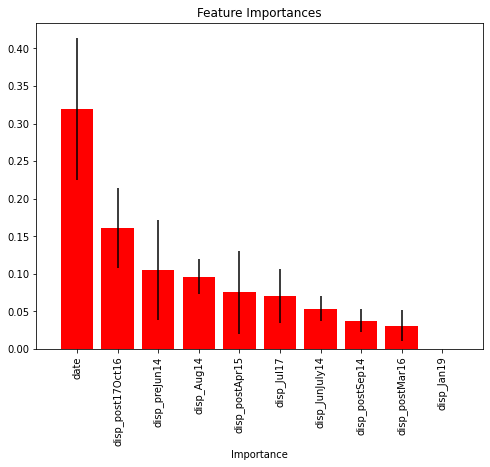

In [43]:

n = 10 # top 10 features

#importances = forest_fit.feature_importances_[:n]
importances = rf.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(master_df.columns[indices])

# Print the feature ranking
print(" Feature ranking:")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(range(10), importances[indices], yerr=std[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("Importance")
ax.set_title("Feature Importances")
plt.savefig('../images/feature_importances.png')